## Web scrapping with Selenium

### Objectives
The aim of this notebook is covers basic scrapping of a table of list of Nigeria universities from wikipedia and basic analysis.



#### import libraries

In [1]:
# call the selenium library
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# open the webpage
url = 'https://en.wikipedia.org/wiki/List_of_universities_in_Nigeria'
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get(url)
time.sleep(6)

#attach table header
header = []
thead = driver.find_element(by=By.TAG_NAME, value="thead")
thead_th = thead.find_elements(by=By.TAG_NAME, value="th")
for th_row in thead_th:
    header.append(th_row.text)
    
#attach table rows    
tr_tags = driver.find_elements(by=By.TAG_NAME, value="tr")
data = []
for t_row in tr_tags:
    td_tags = t_row.find_elements(by=By.TAG_NAME, value="td")
    temp_list = []
    for t_data in td_tags:
        temp_list.append(t_data.text)      
    if temp_list and len(temp_list) > 1:
            data.append(temp_list)
driver.quit()

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Get LATEST chromedriver version for 103.0.5060 google-chrome
[WDM] - Driver [/Users/vivian/.wdm/drivers/chromedriver/mac64/103.0.5060.53/chromedriver] found in cache
/var/folders/2h/rx0njqcs4bncwqw7d6hlndrh0000gp/T/ipykernel_94016/2785155791.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [3]:
#check output
print(header)
data[:3]

['Name', 'State', 'Abbreviation', 'Location', 'Funding', 'Founded']


[['Adekunle Ajasin University',
  'Ondo',
  'AAUA',
  'Akungba-Akoko',
  'State',
  '1999'],
 ['Obafemi Awolowo University', 'Osun', 'OAU', 'Ile Ife', 'Federal', '1961'],
 ['Abia State University', 'Abia', 'ABSU', 'Uturu', 'State', '1981']]

#### Data assessment

In [4]:
nig_unis = pd.DataFrame(data = data, columns = header)
print(nig_unis.shape)
nig_unis.head()

(78, 6)


,Name,State,Abbreviation,Location,Funding,Founded
0,Adekunle Ajasin University,Ondo,AAUA,Akungba-Akoko,State,1999
1,Obafemi Awolowo University,Osun,OAU,Ile Ife,Federal,1961
2,Abia State University,Abia,ABSU,Uturu,State,1981
3,Joseph Ayo Babalola University,Osun,JABU,Ikeji-Arakeji,Private,2006
4,Redeemer's University Nigeria,Osun,RUN,Ede,Private,2005


In [5]:
#check missing values
nig_unis.isnull().sum()

Name            0
State           0
Abbreviation    0
Location        0
Funding         0
Founded         0
dtype: int64

No missing entries

In [6]:
#check duplicated rows
nig_unis.duplicated().sum()

0

In [7]:
nig_unis['Funding'].unique()

array(['State', 'Federal', 'Private', 'private'], dtype=object)

'private' with a lower case p is an error.

In [8]:
#see rows with lowercase 'p'
error_fundind_rows = nig_unis[nig_unis['Funding'] == 'private']
error_fundind_rows

,Name,State,Abbreviation,Location,Funding,Founded
31,International Open Institute,Lagos,IOI,Ikorodu,private,2017


In [9]:
#correct the discrepancies in funding
nig_unis['Funding'] = nig_unis['Funding'].str.replace("private", "Private")
nig_unis['Funding'].unique()

array(['State', 'Federal', 'Private'], dtype=object)

In [10]:
nig_unis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          78 non-null     object
 1   State         78 non-null     object
 2   Abbreviation  78 non-null     object
 3   Location      78 non-null     object
 4   Funding       78 non-null     object
 5   Founded       78 non-null     object
dtypes: object(6)
memory usage: 3.8+ KB


In [11]:
nig_unis.Founded.unique()

array(['1999', '1961', '1981', '2006', '2005', '2010', '2009', '2000',
       '1980', '2002', '2007', '1962', '2005 (1)', '1977', '1959', '2011',
       '2004', '1992', '2008', '', '2017', '1983', '1956', '2021', '1996',
       '2016', '2012', '1988', '2015', '2021[3]', '2001', '2009[4]',
       '2018', '1970', '1975', '1948', '1971', '1955', '2019', '2013'],
      dtype=object)

In [12]:
#change year founded to integer
#funtion to change year founded to integer
def string_float(num):
    if len(num) == 0:
        return None
    elif len(num) > 4:
        num = num[:4]

    return int(num)

In [13]:
nig_unis['Founded'] = nig_unis['Founded'].apply(string_float)
nig_unis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          78 non-null     object 
 1   State         78 non-null     object 
 2   Abbreviation  78 non-null     object 
 3   Location      78 non-null     object 
 4   Funding       78 non-null     object 
 5   Founded       77 non-null     float64
dtypes: float64(1), object(5)
memory usage: 3.8+ KB


#### Some EDA

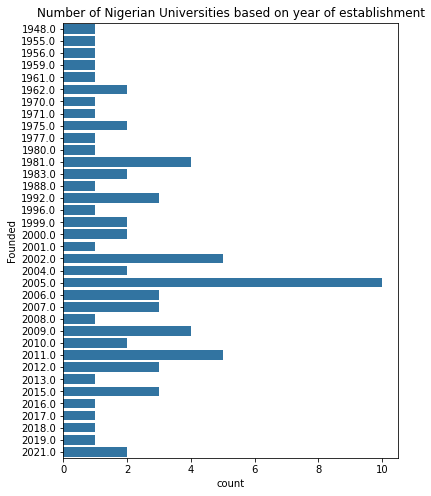

In [14]:
base_color = sns.color_palette()[0]
plt.figure(figsize = [6,8])
sns.countplot(data = nig_unis, y = 'Founded', color = base_color)
plt.title('Number of Nigerian Universities based on year of establishment');

10 Nigerian universities were established in the year 2005.

5 Nigerian universities were established in the years 2002 and 2011.

4 Nigerian universities were established in the years 1981 and 2009.

3 Nigerian universities were established in the years 1992, 2006, 2007, 2012, and 2015.

The first Nigerian University was founded in the year 1948.

In [15]:
#Oldest Nigeria university
nig_unis[nig_unis['Founded'] == 1948]

,Name,State,Abbreviation,Location,Funding,Founded
69,University of Ibadan,Oyo,UI,Ibadan,Federal,1948.0


/Users/vivian/.pyenv/versions/3.9.8/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


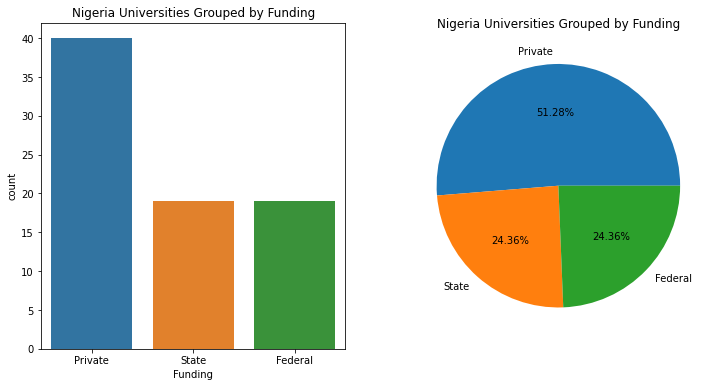

In [16]:
vc_funding = nig_unis['Funding'].value_counts()
plt.figure(figsize = [12,6])

plt.subplot(1,2,1)
sns.countplot(nig_unis['Funding'], order = vc_funding.index)
plt.title('Nigeria Universities Grouped by Funding')

plt.subplot(1,2,2)
plt.pie(vc_funding, labels = vc_funding.index, autopct = '%0.2f%%')
plt.title('Nigeria Universities Grouped by Funding');